![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install sklearn

In [3]:
# Importación librerías
import pandas as pd
import numpy as npa
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [13]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
#df = pd.read_csv('https://github.com/davidzarruk/MIAD_ML_NLP_2023/blob/defb3d86b1d6a74f1c75498c70925bcbd8790653/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

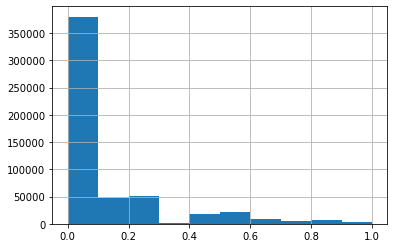

In [14]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [15]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [16]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [17]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:
# Celda 1
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

cv = CountVectorizer(lowercase=True)
X_train_cv = cv.fit_transform(X_train)
print(X_train_cv.shape)
randf = RandomForestRegressor(n_estimators = 50, max_features="sqrt", n_jobs=-1)
xgb = XGBRegressor(n_estimators = 100, random_state = 85, tree_method = "gpu_hist")

xgb.fit(X_train_cv, y_train)

(362779, 141176)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=85,
             reg_alpha=0, reg_lambda=1, ...)

In [19]:
X_test_cv = cv.transform(X_test)
y_pred = xgb.predict(X_test_cv)

In [20]:
cv_mse = metrics.mean_squared_error(y_test, y_pred)

mse_dict = {}

print("MSE del modelo entrenado: {}".format(cv_mse))
mse_dict["countvectorizer"] = cv_mse

MSE del modelo entrenado: 0.020745506031011326


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [21]:
# Celda 2

#se selecciona el numero de max features igual al numero de features del proceso anterior
max_features = 141176 #int(500e3)

cv = CountVectorizer(lowercase=True, ngram_range=(3,3), max_features=max_features)
X_train_cv = cv.fit_transform(X_train)
print(X_train_cv.shape)

xgb = XGBRegressor(n_estimators = 100, random_state = 85)

xgb.fit(X_train_cv, y_train)
# tiempo sin limitar count vectorizer 575min

(362779, 141176)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=85,
             reg_alpha=0, reg_lambda=1, ...)

In [22]:
X_test_cv = cv.transform(X_test)
y_pred = xgb.predict(X_test_cv)

In [23]:
cv_tri_mse = metrics.mean_squared_error(y_test, y_pred)

print("MSE del modelo entrenado: {}".format(cv_tri_mse))
mse_dict["countvectorizer_trigram"] = cv_tri_mse

MSE del modelo entrenado: 0.036674993793409064


Se ve una mejora pronunciada en el desempeño del modelo con tan solo aumentar el tamaño de los n-gramas usados. Esto se puede deber a que las mismas palabras se utilizan en frases negativas y positivas. Algo tan sencillo como "not good" es un bigrama que denota negatividad, a pesar de contener la palabra "good".

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3

Este metodo aplica inicialmente *CountVectorizer* y, posteriormente, calcula la métrica de *TF-IDF* (Term Frequency - Inverse Document Frequency) para cada uno de los elementos encontrados por la primera función. Pero, ¿qué información brinda la métrica de *TF-IDF*? Puesto sencilamente, nos dice si el término es recurrente en el documento y si, además, es un término singular en el dataset (corpus). Por ejemplo si se tiene la palabra "el", esta, al ser un artículo, probablemente aparezca múltiples veces a lo largo de cada documento, así como en el corpus del ejericicio, por lo que su valor de *TF-IDF* debe ser bajo. Pero si se busca la palabra *clorofila*, quizás esté  presente solo en los documentos que hablen sobre plantas. Si nuestro corpus no es específicamente sobre este tema, el valor de *TF-IDF* será alto.

Particularmente, la fórmula de *TF-IDF* es:

* $t$ el término/palabra a analizar
* $d$ un documento
* $D$ cantidad de documentos en el corpus
* $df_{t}$: Número de documentos que contienen el término t

$tfidf(t,d,D) = tf(t,d) * idf(t,D)$

$tfidf(t,d,D) = tf(t,d) * log(\frac{D}{df_{t}})$

Al analizar la ecuación, se ve que el término en el logaritmo es alto cuando el valor de $df_{t}$ es bajo. Es decir, el término analizado es fuertemente singular. A la vez, el valor de $log(\frac{D}{df_{t}})$ será cercano a 0 cuando el valor de $df_{t}$ sea cercano a $D$, que sería equivalente a decir que el término aparece en casi todos los documentos, indicando que es bastante común. 

El *TF-IDF* nos permite determinar la importancia de las palabras premiando los tokens más relevantes mientras se castigan los menos relevantes. En el contexto de este taller, esto permite asignar un mayor nivel de importancia a las palabras más representativas de un comentario con toxicidad alta, de modo que el modelo tendrá una métrica de discriminación más clara. Es decir, cambia la dispersión de la data reduciendo el ruido y resaltando los datos significativos. 

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [24]:
# Celda 4

tfidf = TfidfVectorizer(lowercase=True)

X_train_v = tfidf.fit_transform(X_train)
print(X_train_v.shape)
xgb = XGBRegressor(n_estimators = 100, random_state = 85)

xgb.fit(X_train_v, y_train)

(362779, 141176)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=85,
             reg_alpha=0, reg_lambda=1, ...)

In [25]:
X_test_v = tfidf.transform(X_test)
y_pred = xgb.predict(X_test_v)

In [26]:
cv_tfidf_mse = metrics.mean_squared_error(y_test, y_pred)

print("MSE del modelo entrenado: {}".format(cv_tfidf_mse))
mse_dict["tfidf"] = cv_tfidf_mse

MSE del modelo entrenado: 0.020343818478258637


In [27]:
max_features = int(141176)

tfidf = TfidfVectorizer(lowercase=True,ngram_range = (3,3), max_features=max_features)

X_train_v = tfidf.fit_transform(X_train)
print(X_train_v.shape)
xgb = XGBRegressor(n_estimators = 100, random_state = 85)

xgb.fit(X_train_v, y_train)

(362779, 141176)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=85,
             reg_alpha=0, reg_lambda=1, ...)

In [28]:
X_test_v = tfidf.transform(X_test)
y_pred = xgb.predict(X_test_v)

In [29]:
cv_tfidf_tri_mse = metrics.mean_squared_error(y_test, y_pred)

print("MSE del modelo entrenado: {}".format(cv_tfidf_tri_mse))
mse_dict["tfidf_trigram"] = cv_tfidf_tri_mse

MSE del modelo entrenado: 0.03671219710082734


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

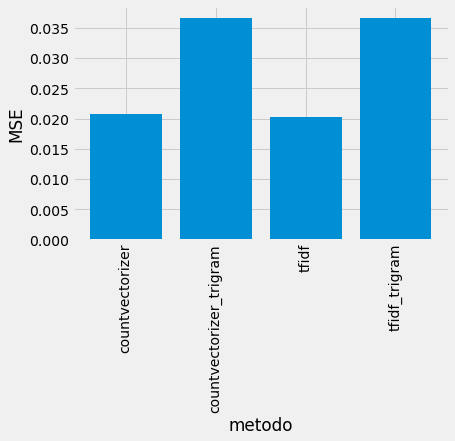

In [30]:
# Celda 5

import matplotlib.pyplot as plt

mse_df = pd.DataFrame.from_dict(mse_dict, orient="index")

plt.style.use('fivethirtyeight')
plt.bar(x=mse_df.index, height=mse_df[0])
plt.xlabel('metodo')
plt.ylabel('MSE')
plt.xticks(rotation=90)

Como se puede ver en la gráfica anterior, la métrica *MSE* revela que el mejor desempeño está dado por el modelo de *TF-IDF* con unigramas. En general, se considera que una de las fortalezas del *TF-IDF* es la extracción de palabras clave, de modo que es entendible cómo se puede aplicar con eficacia al dataset de este taller: Debido a que con esta medida se encuentra si un término es particular/singular en cada documento, aplicarlo a nuestra data resulta en un modelo más efectivo, pues entre más alto el puntaje asociado al término, este sera más "característico" de el tipo de documento en el que está y, a la vez, entre más genéricos sean los tokens, menor puntaje tendrán. Por esto la métrica permite discernir con mayor claridad si una palabra es usada en un comentario negativo, o la califica como negativa con mayor fuerza. Se podría pensar que esta métrica es más fuerte que los *n-gramas*, dado que los datos que tenemos están compuestos de "documentos" de una sola frase, o dos. Al ser tan cortos los documentos, la singularidad de las palabras características aumenta y esto potencia su calificación como "tóxicas".

Los modelos que le siguen son los que utilizan trigramas y tienen un mejor comportamiento que el modelo sencillo de CountVectorizer, ya que una secuencia de palabras brinda más valor para determinar si un comentario es negativo o no, en lugar de tener en cuenta una sola palabra. Por ejemplo, un comentario que diga ***este lugar no es bueno*** es negativo. Sin embargo, la palabra *bueno* también puede encontrarse en comentarios positivos. Este fenómeno es uno de los causantes del puntaje bajo del modelo inicial y también explica por qué el puntaje mejora cuando se aplican los *n-gramas*.